In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [77]:
df = pd.read_csv('/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv')

df['total_sqft'] = df['total_sqft'].apply(lambda x: 
    (float(str(x).split('-')[0].strip()) + float(str(x).split('-')[1].strip())) / 2 
    if isinstance(x, str) and '-' in x else float(x) if str(x).replace('.', '').isdigit() else np.nan
)


df_cleaned = df.dropna(subset=['total_sqft']) 


In [ ]:
df_cleaned['bath'] = df_cleaned['bath'].fillna(0).astype(int)

x = df_cleaned[['total_sqft', 'bath']]
y = df_cleaned['price']

y = np.array(y).reshape(-1, 1)
x.shape[1]

array([[<Axes: title={'center': 'total_sqft'}>,
        <Axes: title={'center': 'bath'}>],
       [<Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

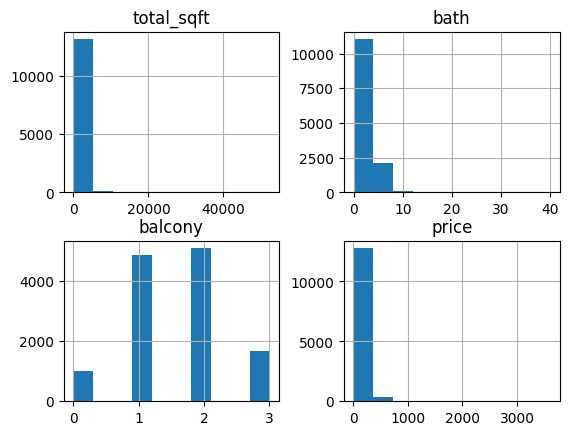

In [93]:
df_cleaned.hist()

In [89]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(x)
scaled_y = sy.fit_transform(y)


# Batch Gradient Descent 

In [ ]:
def batch_gradient_descent(x, y, epochs, lr=0.01):
    
    number_of_features = x.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0

    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_pred = np.dot(w, scaled_X.T) + b # w1 * column1 + w2 * column2

        w_grad = -(2/total_samples)*(X.T.dot(y_ture-y_pred))
        b_grad = -(2/total_samples)*np.sum(y_ture-y_pred)

        w = w - lr * w_grad
        b = b - lr * b_grad

        cost = np.mean(np.square(y_true - y_pred))
        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(epochs)
    return w, b, cost, cost_list, epoch_list



w, b, cost, cost_list, epoch_list = batch_gradient_descent(X, y_true, epochs, lr=0.01)

## we can visualise the cost function using matplotlib

In [ ]:
plt.x_label("epochs")
plt.y_label("cost")
plt.plot(epoch_list, cost_list)

### Now developing prediction funciton to work as same as .predict function from the premade models

In [ ]:
def prediction(column1, column2, w, b):
    scale_X = sx.trandform([[area, bedrooms]])[0]
    scaled_price = w[0]*scaled[0] + w[1]*scaled[1] + b

    sy.inverse_transform([[scaled_price]])

prediciton(2600,4, w, b)

# Stochastic Gradient Descent
using random function to choose how many numbers of batch we acutally want

In [3]:
import random

random.randint(1, 9)

6

In [ ]:
def stochastic_gradient_descent(X, y_true, epochs, lr=0.01):
    
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0

    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = reandom.randint(0, total_sample-1)
        sample_x = X[ranmdom_index]
        sample_y = y_true[random_index]
        y_pred = np.dot(w, sample_x.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_ture-y_pred))
        b_grad = -(2/total_samples)*np.sum(y_ture-y_pred)

        w = w - lr * w_grad
        b = b - lr * b_grad

        cost = np.mean(np.square(y_true - y_pred))
        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(epochs)
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(X, y_true, epochs, lr=0.01)
w, b, cost

### compare the resultant value with the what I acutally got

In [ ]:
w, b, cost

## Plotting stochastic grandient descent with epoch vs cost

In [ ]:
plt.x_label('epochs')
plt.y_label('cost')
plt.plot(cost_list_sgd, epoch_list_sgd)

## Exercise: do mini batch gradient descsent

In [ ]:
def mini_batch_gradient_descent(x, y, epochs, lr=0.01, batch_size=32):
    
    # 1. Initialization
    number_of_features = x.shape[1]
    w = np.ones(shape = (number_of_features))
    b = 0
    total_samples = x.shape[0]

    # Data structure to store history
    cost_list = []
    epoch_list = []

    # is batch size is valid or not
    if batch_size > total_samples:
        batch_size = total_samples

    num_batches = int(np.ceil(total_samples / batch_size))

    indices = np.arange(total_samples)

    # Now running through epochs
    for i in range(epochs):

        np.rand.shuffle(num_batches)

        for j in range(num_batches):
            start_index = j*batch_size
            end_index = min(start_index + batch_size, total_samples)
            batch_indices = indices[start_index:end_index]

            x_batch = x[batch_indices]
            y_batch = y[batch_indices]

            current_batch_size = x_batch.shape[0]

            y_pred = np.dot(w, x_batch.T) + b 

            error = y_batch - y_pred
            w_grad = -(2/current_batch_size) * (x_batch.T.dot(error))
            b_grad = -(2/current_batch_size) * np.sum(error)

            w = w - lr * w_grad
            b = b - lr * b_grad

        y_pred_full = np.dot(w, x.T) + b
        cost = np.mean(np.square(y - y_pred_full))

        if i % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i) # Append 'i' (current epoch), not 'epochs'

    return w, b, cost, cost_list, epoch_list
